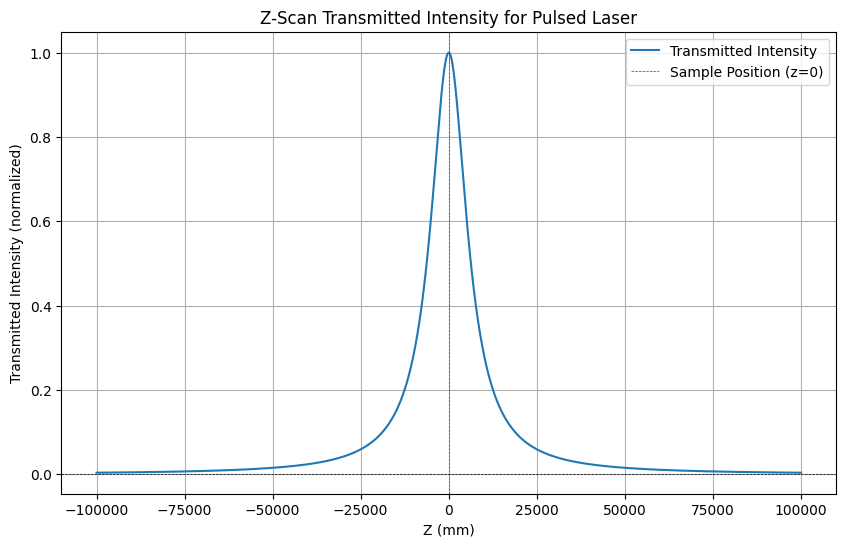

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
w0 = 1e-3  # Beam waist in meters (1 mm)
lambda_ = 500e-9  # Wavelength in meters (500 nm)
k = 2 * np.pi / lambda_  # Wave number

# Pulsed laser parameters
pulse_energy = 1e-3  # Pulse energy in Joules (1 mJ)
pulse_duration = 5e-9  # Pulse duration in seconds (5 ns)
rep_rate = 1e3  # Repetition rate in Hz (1 kHz)

# Nonlinear refractive index (example value)
n2 = 1e-20  # Nonlinear refractive index in m^2/W

# Generate Z values
z = np.linspace(-100, 100, 1000)  # Z positions from -5 mm to 5 mm

# Calculate the Rayleigh range
zR = np.pi * w0**2 / lambda_

# Calculate the beam radius as a function of Z
w_z = w0 * np.sqrt(1 + (z / zR)**2)  # Beam radius at position z

# Calculate the peak intensity at each Z position for a pulsed laser
I_peak = (2 * pulse_energy) / (np.pi * w_z**2 * pulse_duration)  # Peak intensity

# Calculate the change in refractive index
delta_n = n2 * I_peak  # Change in refractive index due to nonlinearity

# Calculate the transmitted intensity
# Using the formula for transmitted intensity in Z-scan
transmitted_intensity = (1 - delta_n) * I_peak

# Normalize the transmitted intensity for visualization
transmitted_intensity = transmitted_intensity / np.max(transmitted_intensity)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(z * 1e3, transmitted_intensity, label='Transmitted Intensity')
plt.title('Z-Scan Transmitted Intensity for Pulsed Laser')
plt.xlabel('Z (mm)')
plt.ylabel('Transmitted Intensity (normalized)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='red', linewidth=0.5, linestyle='--', label='Sample Position (z=0)')
plt.grid()
plt.legend()
plt.show()